<a href="https://colab.research.google.com/github/ZichenLiu123/DataAnalysisStocks/blob/main/Assignment_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Do NOT modify this code cell

# importing useful libraries
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Do NOT modify this code cell

# laoding in the data
df = pd.read_csv("https://raw.githubusercontent.com/MIE223-2024/course-datasets/main/listings.csv")
print(df.shape)
df.head()

(20386, 18)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,1419,Home in Toronto · ★5.0 · 5 bedrooms · 7 beds ·...,1565,Alexandra,NaN,Little Portugal,43.64590,-79.42423,Entire home/apt,NaN,28,6,2017-08-07,0.06,1,0,0,NaN
1,8077,Rental unit in Toronto · ★4.84 · 1 bedroom · 1...,22795,Kathie & Larry,NaN,Waterfront Communities-The Island,43.64080,-79.37673,Private room,100.0,180,169,2013-08-27,0.96,2,0,0,NaN
2,26654,Condo in Toronto · ★4.79 · 1 bedroom · 2 beds ...,113345,Adela,NaN,Waterfront Communities-The Island,43.64608,-79.39032,Entire home/apt,145.0,28,42,2023-09-01,0.27,5,77,2,NaN
3,27423,Rental unit in Toronto · ★4.93 · Studio · 1 be...,118124,Brent,NaN,South Riverdale,43.66884,-79.32725,Entire home/apt,75.0,90,28,2023-08-31,0.17,1,215,1,NaN
4,30931,Rental unit in Toronto · 1 bedroom · 2 beds · ...,22795,Kathie & Larry,NaN,Waterfront Communities-The Island,43.64015,-79.37625,Entire home/apt,134.0,180,1,2010-08-11,0.01,2,0,0,NaN


Creating `rating` column from `name` column by pulling all numbers after the `★` character.

In [ ]:
# Do NOT modify this code cell

# creating 'rating' column
star_char = "★"

df['rating'] = df['name'].apply(lambda x: re.findall(star_char + "(\d+.?\d*)", x)[0] if len(re.findall(star_char + "(\d+.?\d*)", x)) > 0 else np.nan)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating
0,1419,Home in Toronto · ★5.0 · 5 bedrooms · 7 beds ·...,1565,Alexandra,NaN,Little Portugal,43.64590,-79.42423,Entire home/apt,NaN,28,6,2017-08-07,0.06,1,0,0,NaN,5.0
1,8077,Rental unit in Toronto · ★4.84 · 1 bedroom · 1...,22795,Kathie & Larry,NaN,Waterfront Communities-The Island,43.64080,-79.37673,Private room,100.0,180,169,2013-08-27,0.96,2,0,0,NaN,4.84
2,26654,Condo in Toronto · ★4.79 · 1 bedroom · 2 beds ...,113345,Adela,NaN,Waterfront Communities-The Island,43.64608,-79.39032,Entire home/apt,145.0,28,42,2023-09-01,0.27,5,77,2,NaN,4.79
3,27423,Rental unit in Toronto · ★4.93 · Studio · 1 be...,118124,Brent,NaN,South Riverdale,43.66884,-79.32725,Entire home/apt,75.0,90,28,2023-08-31,0.17,1,215,1,NaN,4.93
4,30931,Rental unit in Toronto · 1 bedroom · 2 beds · ...,22795,Kathie & Larry,NaN,Waterfront Communities-The Island,43.64015,-79.37625,Entire home/apt,134.0,180,1,2010-08-11,0.01,2,0,0,NaN,NaN


## Q1(a)

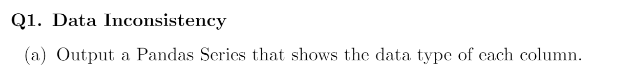

In [ ]:
# your code starts here #
df.dtypes
# end #

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
rating                             object
dtype: object

## Q1(b)

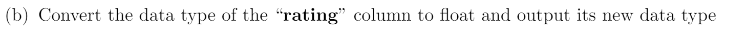

In [ ]:
# your code starts here #
df['rating'] = df['rating'].astype(float)
df['rating'].dtype

# end #

dtype('float64')

## Q2

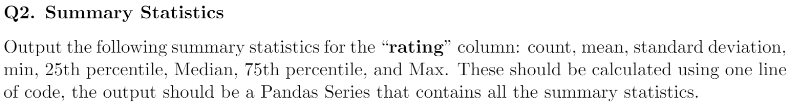

In [ ]:
# your code starts here #
df['rating'].describe()
# end #

count    12137.000000
mean         4.789276
std          0.263310
min          1.670000
25%          4.710000
50%          4.860000
75%          4.970000
max          5.000000
Name: rating, dtype: float64

Your explanation goes here:


## Q3(a)

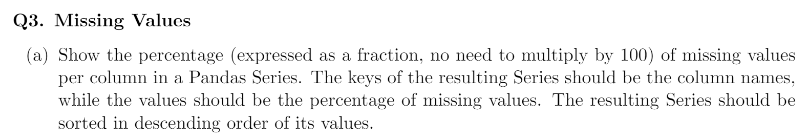

In [ ]:
# your code starts here
missing_percentage = df.isnull().sum() / df.isnull().shape[0]
missing_percentage_sorted = missing_percentage.sort_values(ascending=False)
print(missing_percentage_sorted)
# end

neighbourhood_group               1.000000
license                           0.536152
rating                            0.404640
last_review                       0.257922
reviews_per_month                 0.257922
price                             0.185961
host_name                         0.000098
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
name                              0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
neighbourhood                     0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
number_of_reviews_ltm             0.000000
host_id                           0.000000
id                                0.000000
dtype: float64


## Q3(b)

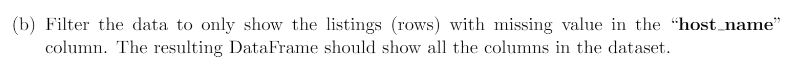

In [ ]:
# your code starts here #
df[df['host_name'].isnull()]
# end #

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating
846,6104732,Rental unit in Toronto · 1 bedroom · 1 bed · 1...,31675651,NaN,NaN,Waterfront Communities-The Island,43.65095,-79.35694,Entire home/apt,NaN,28,1,2015-07-27,0.01,1,0,0,NaN,NaN
2919,17417181,Rental unit in Toronto · 1 bedroom · 2 beds · ...,75779190,NaN,NaN,Edenbridge-Humber Valley,43.68364,-79.51211,Private room,NaN,28,0,NaN,NaN,1,0,0,NaN,NaN


## Q3(c)

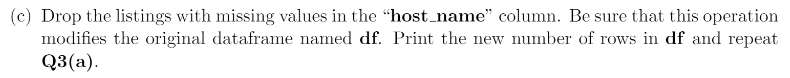

In [ ]:
# your code start here #
df.drop([846,2919], axis = 0, inplace = True)
print(df.shape[0])
missing_percentage = df.isnull().sum() / df.isnull().shape[0]
missing_percentage_sorted = missing_percentage.sort_values(ascending=False)
print(missing_percentage_sorted)
# end #

20384
neighbourhood_group               1.000000
license                           0.536107
rating                            0.404582
last_review                       0.257898
reviews_per_month                 0.257898
price                             0.185881
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
name                              0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
neighbourhood                     0.000000
host_name                         0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
number_of_reviews_ltm             0.000000
host_id                           0.000000
id                                0.000000
dtype: float64


## Q3(d)

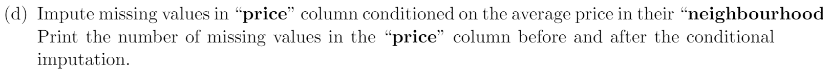

In [ ]:
# Do NOT modify this code cell

# summary statistics of price before imputing nan values
df['price'].describe()

count    16595.000000
mean       177.039168
std        333.108977
min          8.000000
25%         75.000000
50%        120.000000
75%        195.000000
max      12400.000000
Name: price, dtype: float64

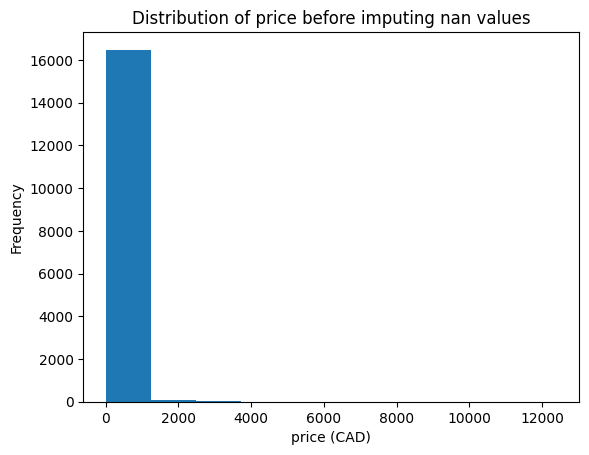

In [ ]:
# Do NOT modify this code cell
plt.hist(df['price'])
plt.xlabel('price (CAD)')
plt.ylabel('Frequency')
plt.title("Distribution of price before imputing nan values")
plt.show()

In [ ]:
print(f"Before imputing null values, 'price' column has: {df['price'].isnull().sum()} null values")

df['price'] = df['price'].fillna(df.groupby('neighbourhood')['price'].transform("mean"))
# your code start here #

# end #

print(f"After imputing null values, 'price' column now has: {df['price'].isnull().sum()} null values")

Before imputing null values, 'price' column has: 3789 null values
After imputing null values, 'price' column now has: 0 null values


In [ ]:
# Do NOT modify this code cell

# summary statistics of price after imputing nan values
df['price'].describe()

count    20384.000000
mean       178.209381
std        301.435569
min          8.000000
25%         84.000000
50%        135.000000
75%        205.548649
max      12400.000000
Name: price, dtype: float64

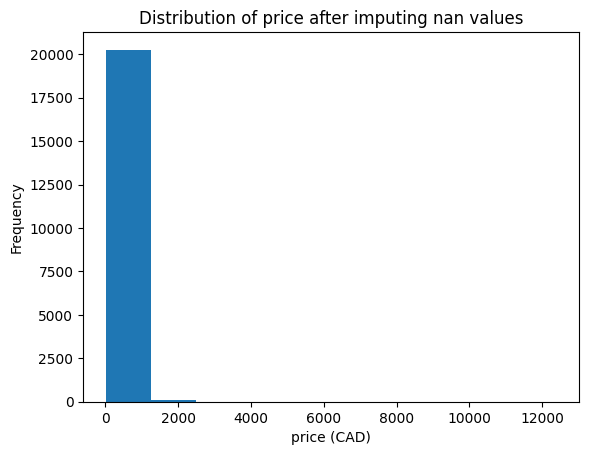

In [ ]:
# Do NOT modify this code cell
plt.hist(df['price'])
plt.xlabel('price (CAD)')
plt.ylabel('Frequency')
plt.title("Distribution of price after imputing nan values")
plt.show()

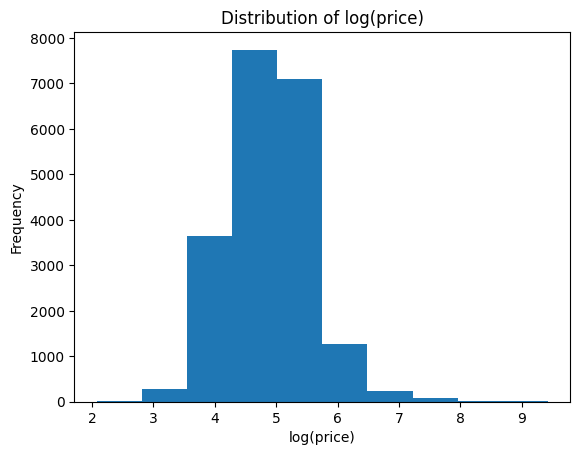

In [ ]:
# Do NOT modify this code cell

plt.hist(np.log(df['price']))
plt.xlabel('log(price)')
plt.ylabel('Frequency')
plt.title("Distribution of log(price)")
plt.show()

## Q4(a)

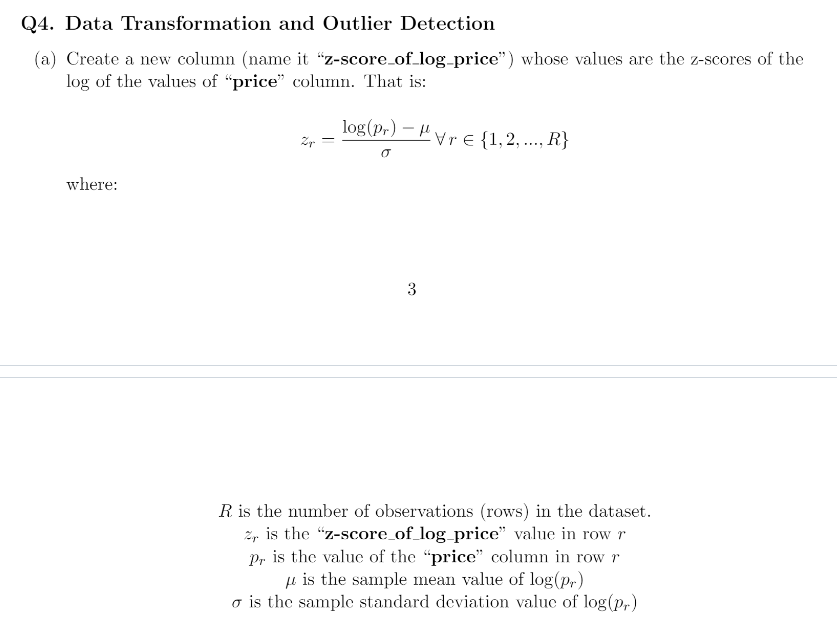

In [ ]:
# your code start here #
lgPr = np.log(df['price'])
df['z-score_of_log_price'] = (lgPr - lgPr.mean()) / np.std(lgPr)
df['z-score_of_log_price']
# end #

0        0.368724
1       -0.407479
2        0.130271
3       -0.823829
4        0.016090
           ...   
20381    0.069110
20382   -1.246627
20383    0.351940
20384    0.930165
20385   -0.923680
Name: z-score_of_log_price, Length: 20384, dtype: float64

## Q4(b)

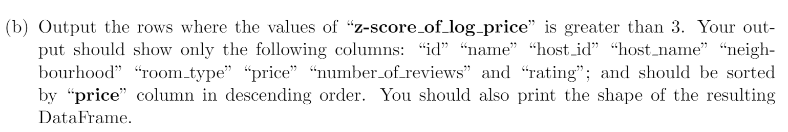

In [ ]:
cols_to_output = ["id", "name", "host_id", "host_name", "neighbourhood", "room_type", "price", "number_of_reviews", "rating"]

zscore_threshold = 3

# your code start here #
top_priced_listings = df[df['z-score_of_log_price'] > 3]
top_priced_listings = top_priced_listings[cols_to_output].sort_values(by ='price', ascending = False)

# end #

print(f"The shape of top_priced_listings is: {top_priced_listings.shape}")

top_priced_listings # Outputs top_priced_listings.
                    # Note, Google Colab may truncate this outputs to the first five and last five rows. If done, leave your output truncated by Google Colab.

The shape of top_priced_listings is: (135, 9)


,id,name,host_id,host_name,neighbourhood,room_type,price,number_of_reviews,rating
6347,34839883,Rental unit in Toronto · ★4.86 · 1 bedroom · 2...,12931053,Colin,Palmerston-Little Italy,Entire home/apt,12400.0,14,4.86
13734,817482211849894783,Condo in Toronto · ★4.58 · 1 bedroom · 2 beds ...,495792127,Luca,Waterfront Communities-The Island,Entire home/apt,10000.0,26,4.58
6651,36472537,Boutique hotel in Toronto · ★4.67 · 1 bedroom ...,271838768,Bond,Church-Yonge Corridor,Private room,10000.0,3,4.67
13537,805886428886308611,Rental unit in Toronto · ★4.68 · Studio · 1 be...,496441567,Jacob Willow James,Palmerston-Little Italy,Entire home/apt,10000.0,25,4.68
4974,27454496,Condo in Toronto · ★4.87 · Studio · 2 beds · 1...,206884960,Jenny,Waterfront Communities-The Island,Entire home/apt,10000.0,193,4.87
...,...,...,...,...,...,...,...,...,...
13384,796337762508111807,Townhouse in Toronto · 4 bedrooms · 4 beds · 4...,325867297,Reservations,Palmerston-Little Italy,Entire home/apt,1143.0,0,NaN
13768,819435742562780946,Home in Toronto · 2 bedrooms · 3 beds · 2 baths,384337721,Sophie U,University,Entire home/apt,1142.0,1,NaN
4523,24719725,Villa in Toronto · ★4.97 · 5 bedrooms · 8 beds...,186849332,Eve,Bayview Woods-Steeles,Entire home/apt,1128.0,33,4.97
9567,52411976,Villa in Toronto · ★4.94 · 5 bedrooms · 5 beds...,59534696,Chengyi,Newtonbrook East,Entire home/apt,1100.0,108,4.94


## Q4(c)

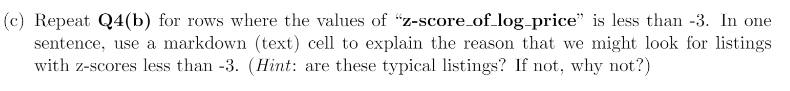

In [ ]:
# your code start here #
bottom_priced_listings = df[df['z-score_of_log_price'] < -3]
bottom_priced_listings = bottom_priced_listings[cols_to_output].sort_values(by = 'price', ascending = False)
# end #

print(f"The shape of bottom_priced_listings is: {bottom_priced_listings.shape}")

bottom_priced_listings # outputs bottom_priced_listings

The shape of bottom_priced_listings is: (15, 9)


,id,name,host_id,host_name,neighbourhood,room_type,price,number_of_reviews,rating
9320,51291028,Home in Toronto · ★4.88 · 1 bedroom · 1 bed · ...,401125255,Cuong,Junction Area,Private room,16.0,8,4.88
13265,788386071136812754,Condo in Toronto · 3 bedrooms · 4 beds · 2 baths,492380649,Jo,Waterfront Communities-The Island,Entire home/apt,16.0,1,NaN
14049,836542572820667145,Home in Toronto · ★4.71 · 1 bedroom · 1 bed · ...,38195238,Marcel,Edenbridge-Humber Valley,Private room,16.0,7,4.71
15411,895646922644026152,Condo in Toronto · Studio · 2 beds · 1 bath,515685939,Golrokh,Waterfront Communities-The Island,Entire home/apt,15.0,2,NaN
4724,25904215,Condo in Toronto · ★4.96 · 1 bedroom · 1 bed ·...,109770464,Jason,Waterfront Communities-The Island,Entire home/apt,14.0,83,4.96
9570,52427063,Home in Toronto · ★5.0 · 3 bedrooms · 3 beds ·...,250311734,Yafit,Oakwood Village,Entire home/apt,14.0,9,5.00
10719,621560938990601802,Home in Toronto · 1 bedroom · 1 bed · 1 shared...,272046245,Naira,Wexford/Maryvale,Shared room,14.0,2,NaN
10907,639006140189389664,Home in Toronto · 2 bedrooms · 1 bed · 1 priva...,444938485,Shamim,Stonegate-Queensway,Private room,14.0,0,NaN
11304,669742124016099779,Home in Toronto · 1 bedroom · 1 bed · 2 shared...,272046245,Naira,Oakridge,Shared room,14.0,0,NaN
11305,669748890331341050,Home in Toronto · 1 bedroom · 1 bed · 2 shared...,272046245,Naira,Oakridge,Shared room,14.0,0,NaN


*Question*: In one sentence, explain the reason that we might look for listings with z-scores < -3.  (*Hint*: are these typical listings?  If not, why not?)

*Your explanation goes here*: The reason why we are looking for listings with z-scores less than -3 is that these listings are more than 3 standard deviations away. Which means these data will be the bottom 0.03%. Which are not typical listings.